# PyTorch

## Tensors

In [151]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

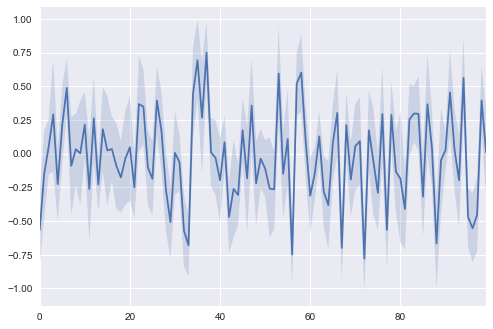

In [100]:
x = torch.randn(10, 100)

sns.tsplot(x.numpy())

## Autograd: automatic differentiation

In [148]:
# forward pass
x = Variable(torch.ones(2, 2), requires_grad=True)
y = x+2
z = y * y * 3
out = z.mean()
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [134]:
# backward pass
out.backward()
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

## Neural Networks

In [221]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        return int(np.prod(x.size()[1:]))

net = Net()
net

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [270]:
# synthetic data
input = Variable(torch.randn(1, 1, 32, 32))
target = Variable(torch.range(1, 10))

In [311]:
# forward pass
out = net(input)
# out, sns.tsplot(out.data.numpy())

In [308]:
# compute loss
criterion = nn.MSELoss()
loss = criterion(out, target)
loss

Variable containing:
 38.7042
[torch.FloatTensor of size 1]

In [309]:
# backward pass
net.zero_grad()
loss.backward()